<a href="https://colab.research.google.com/github/amilkh/cs230-fer/blob/master/fer2013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install tensorflow-gpu==2.0

In [0]:
# Import libraries for data visualization and processing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import TensorFlow and TensorFlow Eager
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, InputLayer, MaxPool2D

# Make the plots appear inline in the notebook
%matplotlib inline

In [3]:
%cd drive/'My Drive'/'cs230 project'/collab
data = pd.read_csv('fer2013/fer2013.csv')

/content/drive/My Drive/cs230 project/collab


In [4]:
print('Number of samples in the dataset: ', data.shape[0])

Number of samples in the dataset:  35887


In [0]:
emotion_cat = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}


In [6]:
# See the target distribution (check for imbalance)
target_counts = data['emotion'].value_counts().reset_index(drop=False)
target_counts.columns = ['emotion', 'number_samples']
target_counts['emotion'] = target_counts['emotion'].map(emotion_cat)
target_counts

,emotion,number_samples
0,Happy,8989
1,Neutral,6198
2,Sad,6077
3,Fear,5121
4,Angry,4953
5,Surprise,4002
6,Disgust,547


In [0]:
# Transform images from strings to lists of integers. TODO: use an array cast
data['pixels'] = data['pixels'].apply(lambda x: [int(pixel) for pixel in x.split()])

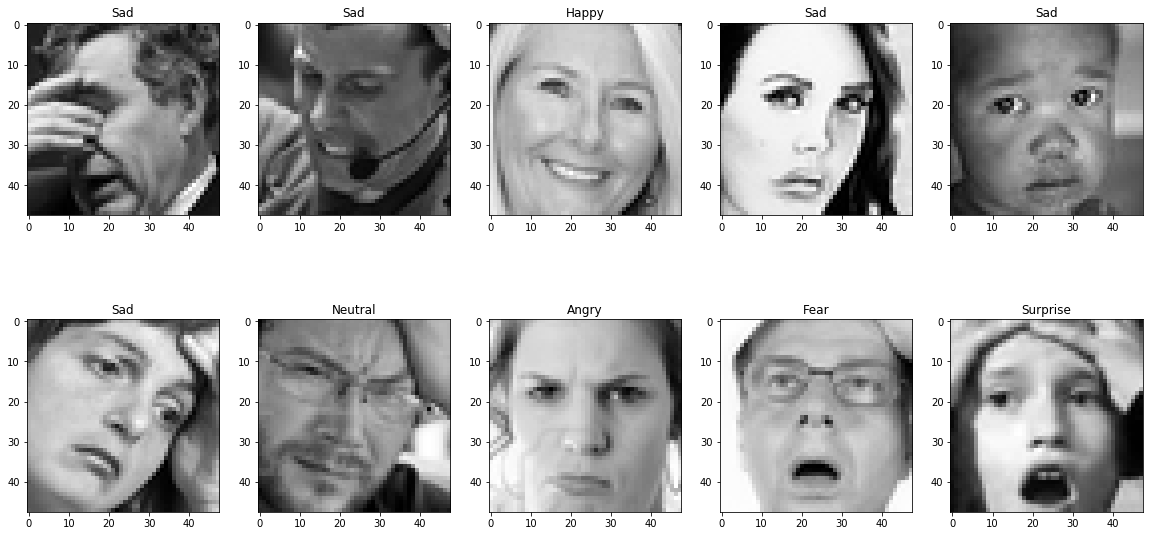

In [8]:
# Change seed here to see other images
random_seed = 2

# Select randomly 10 images
data_sample = data.sample(10, random_state=random_seed)

# Create subplots for images
f, axarr = plt.subplots(2, 5, figsize=(20, 10))

# Plot images
i, j = 0, 0
for idx, row in data_sample.iterrows():
    img = np.array(row['pixels']).reshape(48,48)
    axarr[i,j].imshow(img, cmap='gray')
    axarr[i,j].set_title(emotion_cat[row['emotion']])
    if j==4:
        i += 1
        j = 0
    else:
        j += 1

In [9]:
data_train = data[data['Usage']=='Training']
size_train = data_train.shape[0]
print('Number samples in the training dataset: ', size_train)

data_dev = data[data['Usage']=='PublicTest']
size_dev = data_dev.shape[0]
print('Number samples in the development dataset: ', size_dev)

# Retrieve train input and target
X_train, y_train = data_train['pixels'].tolist(), data_train['emotion'].as_matrix()
# Reshape images to 4D (num_samples, width, height, num_channels)
X_train = np.array(X_train, dtype='float32').reshape(-1,48,48,1)
# Normalize images with max (the maximum pixel intensity is 255)
X_train = X_train/255.0

# Retrieve dev input and target
X_dev, y_dev = data_dev['pixels'].tolist(), data_dev['emotion'].as_matrix()
# Reshape images to 4D (num_samples, width, height, num_channels)
X_dev = np.array(X_dev, dtype='float32').reshape(-1,48,48,1)
# Normalize images with max
X_dev = X_dev/255.0

Number samples in the training dataset:  28709
Number samples in the development dataset:  3589


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [0]:
model = tf.keras.models.Sequential(   
    [
     InputLayer(input_shape=(48,48,1),name="input"),
     Conv2D(filters=32,kernel_size=3,activation='relu',padding='same',name="conv1"),
     Conv2D(filters=32,kernel_size=3,activation='relu',padding='same',name="conv2"),
     MaxPool2D(pool_size=(2,2),name="maxpool1"),
     Conv2D(filters=64,kernel_size=3,activation='relu',padding='same',name="conv3"),
     Conv2D(filters=64,kernel_size=3,activation='relu',padding='same',name="conv4"),
     Flatten(),
     Dense(1024,input_shape=(24*24*64,1),activation='relu',name='fc1'),
     Dense(7,input_shape=(1024,1),activation='softmax',name='fc-softmax')
    ]
)

In [0]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 48, 48, 32)        320       
_________________________________________________________________
conv2 (Conv2D)               (None, 48, 48, 32)        9248      
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 24, 24, 32)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 24, 24, 64)        18496     
_________________________________________________________________
conv4 (Conv2D)               (None, 24, 24, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
fc1 (Dense)                  (None, 1024)              3

In [16]:
model.fit(X_train,y_train,batch_size=32,epochs=10)


Train on 28709 samples
Epoch 1/10
28709/28709 [==============================] - 10s 341us/sample - loss: 1.3484 - accuracy: 0.4813
Epoch 2/10
28709/28709 [==============================] - 10s 339us/sample - loss: 1.0763 - accuracy: 0.5970
Epoch 3/10
28709/28709 [==============================] - 10s 341us/sample - loss: 0.6348 - accuracy: 0.7699
Epoch 4/10
28709/28709 [==============================] - 10s 338us/sample - loss: 0.2084 - accuracy: 0.9366
Epoch 5/10
28709/28709 [==============================] - 10s 339us/sample - loss: 0.0984 - accuracy: 0.9773
Epoch 6/10
28709/28709 [==============================] - 10s 338us/sample - loss: 0.0664 - accuracy: 0.9880
Epoch 7/10
28709/28709 [==============================] - 10s 340us/sample - loss: 0.0578 - accuracy: 0.9907
Epoch 8/10
28709/28709 [==============================] - 10s 339us/sample - loss: 0.0522 - accuracy: 0.9897
Epoch 9/10
28709/28709 [==============================] - 10s 339us/sample - loss: 0.0620 - accuracy: 0.9

In [0]:
y_hat_dev = np.argmax(model.predict(X_dev), axis=1)

In [24]:
import sklearn.metrics as sm
sm.accuracy_score(y_hat_dev, y_dev)

0.5280022290331569